In [94]:
import pandas as pd
import numpy as np
# Load the data from the CSV file
data = pd.read_csv("dataset/dataset.csv")

# Drop the 'sale' column
data_dropped = data.drop(columns=['sale'], errors='ignore')

# Display the first few rows of the modified dataset
data_dropped.head()


,Date,Product ID,Sale Count,Inventory
0,06-18-2023,Product_1,4,60
1,06-19-2023,Product_1,4,56
2,06-20-2023,Product_1,4,52
3,06-21-2023,Product_1,4,48
4,06-22-2023,Product_1,4,44


In [95]:
# Drop the 'Sale Count' column
data_dropped_2 = data_dropped.drop(columns=['Sale Count'], errors='ignore')

# Display the first few rows of the further modified dataset
data_dropped_2.head()
# Data Preprocessing

# Convert 'Date' column to datetime object
data_dropped_2['Date'] = pd.to_datetime(data_dropped_2['Date'])

# Extract 'weekday' column (0 = Monday, 6 = Sunday)
data_dropped_2['weekday'] = data_dropped_2['Date'].dt.weekday

# Create 'holiday' column (assuming weekends are holidays)
data_dropped_2['holiday'] = data_dropped_2['weekday'].apply(lambda x: 1 if x >= 5 else 0)

data_dropped_2.head()
from sklearn.preprocessing import MinMaxScaler

# Features and target variable
features = data_dropped_2[['weekday', 'holiday']]
target = data_dropped_2['Inventory']

# Scaling features and target variable
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

scaled_features = feature_scaler.fit_transform(features)
scaled_target = target_scaler.fit_transform(target.values.reshape(-1, 1))

# Transforming data to suitable format for LSTM
def transform_data(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# Using 7 days as time steps for LSTM input
TIME_STEPS = 1
X, y = transform_data(scaled_features, scaled_target, TIME_STEPS)

X.shape, y.shape


((59, 1, 2), (59, 1))

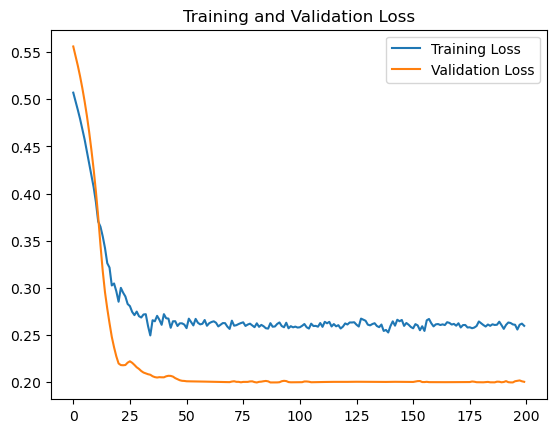

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Building the LSTM model
model = Sequential([
    LSTM(100, activation='relu', return_sequences=True, input_shape=(TIME_STEPS, X.shape[2]),dropout=0.2),
    # LSTM(100, activation='relu', return_sequences=False, input_shape=(TIME_STEPS, X.shape[2]),dropout=0.2),
    LSTM(100, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mae')

# Train the model
history = model.fit(X, y, epochs=200, batch_size=16, validation_split=0.2, verbose=0)

# Plotting the training loss and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

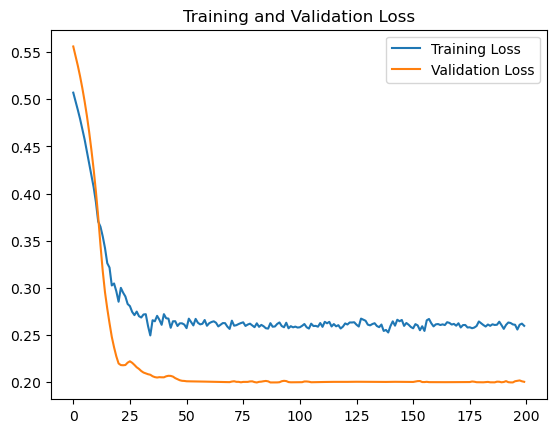

In [97]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


2/2 [==============================] - 0s 2ms/step


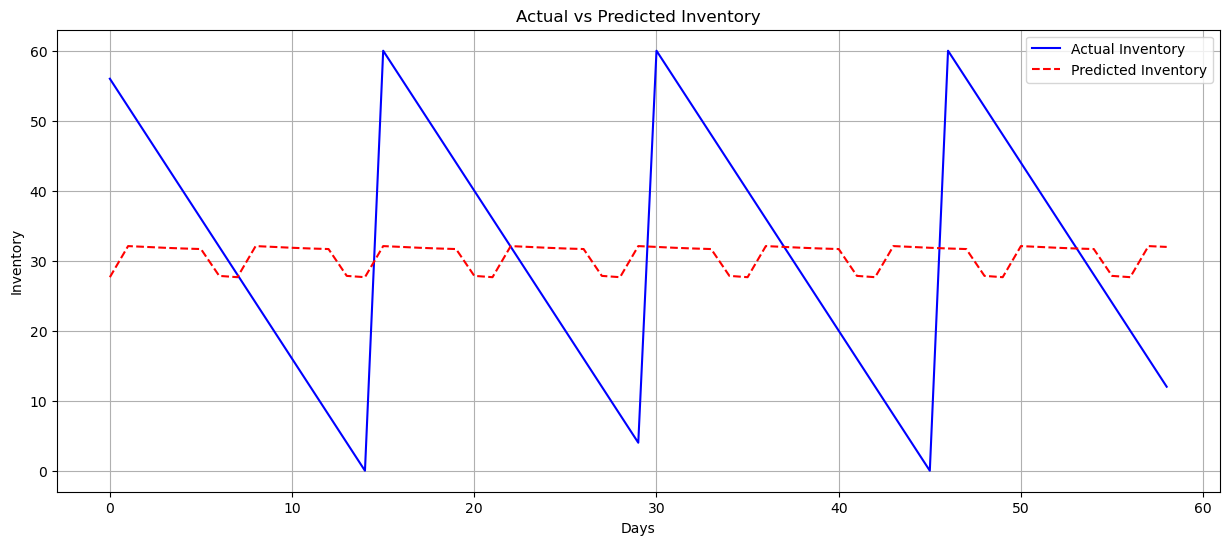

array([[0.93333333],
       [0.86666667],
       [0.8       ],
       [0.73333333],
       [0.66666667],
       [0.6       ],
       [0.53333333],
       [0.46666667],
       [0.4       ],
       [0.33333333],
       [0.26666667],
       [0.2       ],
       [0.13333333],
       [0.06666667],
       [0.        ],
       [1.        ],
       [0.93333333],
       [0.86666667],
       [0.8       ],
       [0.73333333],
       [0.66666667],
       [0.6       ],
       [0.53333333],
       [0.46666667],
       [0.4       ],
       [0.33333333],
       [0.26666667],
       [0.2       ],
       [0.13333333],
       [0.06666667],
       [1.        ],
       [0.93333333],
       [0.86666667],
       [0.8       ],
       [0.73333333],
       [0.66666667],
       [0.6       ],
       [0.53333333],
       [0.46666667],
       [0.4       ],
       [0.33333333],
       [0.26666667],
       [0.2       ],
       [0.13333333],
       [0.06666667],
       [0.        ],
       [1.        ],
       [0.933

In [98]:
import matplotlib.pyplot as plt
predictions = model.predict(X)# Assuming 'y_test' is your actual test target values
original_scale_predictions = target_scaler.inverse_transform(predictions)
y1 = target_scaler.inverse_transform(y)
# and 'original_scale_predictions' is the predicted values (as mentioned earlier)
plt.figure(figsize=(15, 6))
plt.plot(y1, label='Actual Inventory', color='blue')
plt.plot(original_scale_predictions, label='Predicted Inventory', color='red', linestyle='dashed')
plt.title('Actual vs Predicted Inventory')
plt.xlabel('Days')
plt.ylabel('Inventory')
plt.legend()
plt.grid(True)
plt.show()
y

In [103]:
from tensorflow.keras.layers import GRU

model = Sequential([
    GRU(100, activation='relu', return_sequences=True, input_shape=(TIME_STEPS, X.shape[2])),
    GRU(100, activation='relu', return_sequences=True),
    GRU(100, activation='relu', return_sequences=True),
    GRU(100, activation='relu', return_sequences=True),
    GRU(100, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
history = model.fit(X, y, epochs=100, validation_split=0.2, verbose=1)


Epoch 1/100
2/2 [==============================] - 3s 353ms/step - loss: 4558974.0000 - val_loss: 4847957.5000
Epoch 2/100
2/2 [==============================] - 0s 18ms/step - loss: 4558934.0000 - val_loss: 4847907.0000
Epoch 3/100
2/2 [==============================] - 0s 19ms/step - loss: 4558887.0000 - val_loss: 4847850.5000
Epoch 4/100
2/2 [==============================] - 0s 19ms/step - loss: 4558835.0000 - val_loss: 4847785.5000
Epoch 5/100
2/2 [==============================] - 0s 17ms/step - loss: 4558778.0000 - val_loss: 4847709.5000
Epoch 6/100
2/2 [==============================] - 0s 18ms/step - loss: 4558707.5000 - val_loss: 4847620.5000
Epoch 7/100
2/2 [==============================] - 0s 19ms/step - loss: 4558627.5000 - val_loss: 4847513.5000
Epoch 8/100
2/2 [==============================] - 0s 19ms/step - loss: 4558530.0000 - val_loss: 4847383.5000
Epoch 9/100
2/2 [==============================] - 0s 19ms/step - loss: 4558409.5000 - val_loss: 4847221.5000
Epoch 10/

2/2 [==============================] - 0s 2ms/step


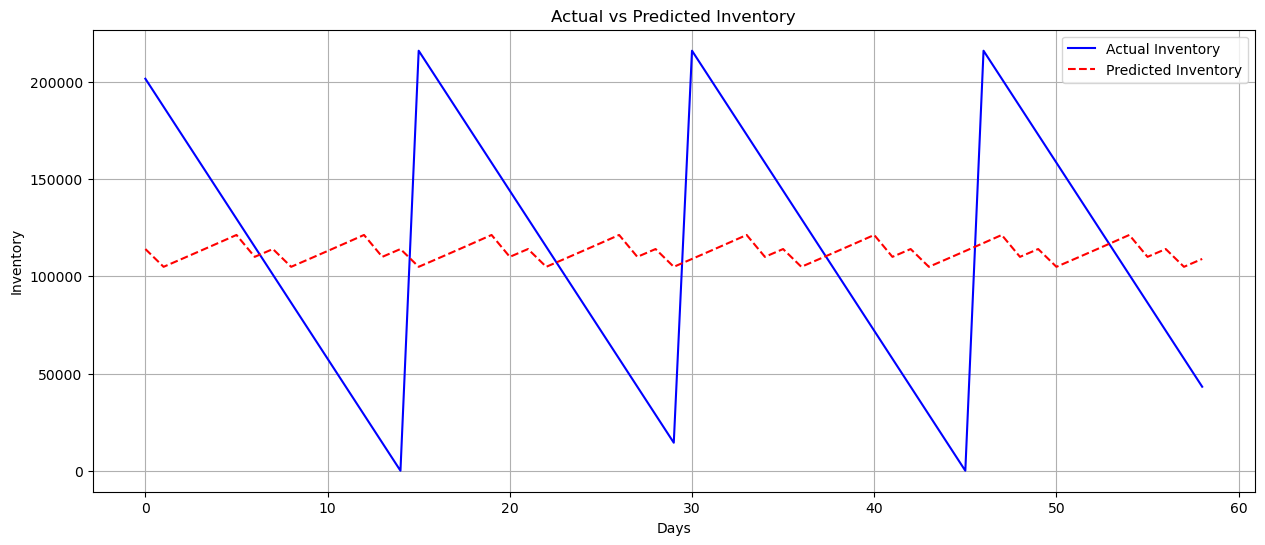

array([[201600.],
       [187200.],
       [172800.],
       [158400.],
       [144000.],
       [129600.],
       [115200.],
       [100800.],
       [ 86400.],
       [ 72000.],
       [ 57600.],
       [ 43200.],
       [ 28800.],
       [ 14400.],
       [     0.],
       [216000.],
       [201600.],
       [187200.],
       [172800.],
       [158400.],
       [144000.],
       [129600.],
       [115200.],
       [100800.],
       [ 86400.],
       [ 72000.],
       [ 57600.],
       [ 43200.],
       [ 28800.],
       [ 14400.],
       [216000.],
       [201600.],
       [187200.],
       [172800.],
       [158400.],
       [144000.],
       [129600.],
       [115200.],
       [100800.],
       [ 86400.],
       [ 72000.],
       [ 57600.],
       [ 43200.],
       [ 28800.],
       [ 14400.],
       [     0.],
       [216000.],
       [201600.],
       [187200.],
       [172800.],
       [158400.],
       [144000.],
       [129600.],
       [115200.],
       [100800.],
       [ 8

In [104]:
import matplotlib.pyplot as plt
predictions = model.predict(X)# Assuming 'y_test' is your actual test target values
original_scale_predictions = target_scaler.inverse_transform(predictions)
y = target_scaler.inverse_transform(y)
# and 'original_scale_predictions' is the predicted values (as mentioned earlier)
plt.figure(figsize=(15, 6))
plt.plot(y, label='Actual Inventory', color='blue')
plt.plot(original_scale_predictions, label='Predicted Inventory', color='red', linestyle='dashed')
plt.title('Actual vs Predicted Inventory')
plt.xlabel('Days')
plt.ylabel('Inventory')
plt.legend()
plt.grid(True)
plt.show()
y